### Importing necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

import seaborn as sns


In [3]:
data=pd.read_csv("/home/sakshi/Documents/creditcard.csv")

In [4]:
data['Class'].value_counts()# Data/output variable is imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
x=data.drop(columns='Class')
y=data['Class']

In [7]:
state=np.random.RandomState(42)
outliers=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))

In [8]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


### EDA

In [9]:
# checking missing values
data.isnull().sum().any()

False

In [10]:
labels=data['Class'].value_counts()
labels.rename({0:'Normal',1:'Fraud'},inplace=True)

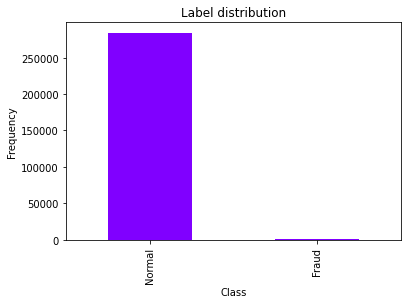

In [11]:
labels.plot(kind='bar',colormap='rainbow')
plt.title("Label distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [12]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [13]:
print(fraud.shape)
print(normal.shape)


(492, 31)
(284315, 31)


In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


### Logistic Regression

In [45]:
lr=LogisticRegression(max_iter=1000)

In [49]:
params={'C':10.0**np.arange(-2,3)}

In [50]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(lr,X_train,y_train,cv=kf)

In [52]:
clf=GridSearchCV(lr,params,cv=kf,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1_macro')

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[85268    13]
 [   64    98]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85281
           1       0.88      0.60      0.72       162

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443


 Accuracy score : 0.9990988144142879
------------------------------


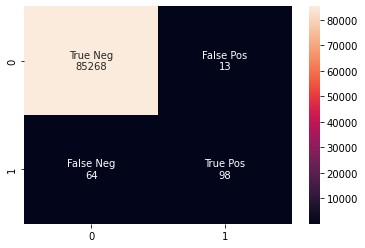

In [53]:
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)


In [54]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [56]:
accuracy_score(y_test,y_pred)

0.9990988144142879

In [61]:
y_train.value_counts()

0    199034
1       330
Name: Class, dtype: int64

In [62]:
y_test.value_counts()

0    85281
1      162
Name: Class, dtype: int64

In [66]:
pd.DataFrame(y_pred).value_counts()

0    85332
1      111
dtype: int64

### RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
class_weight=dict({0:1,1:100})


In [69]:
rfc=RandomForestClassifier(class_weight=class_weight)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[85277     4]
 [   39   123]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85281
           1       0.97      0.76      0.85       162

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443


 Accuracy score : 0.9994967405170698
------------------------------


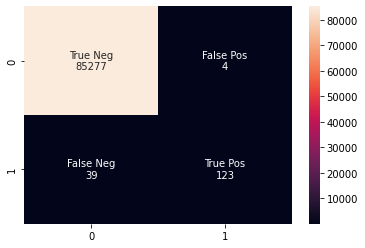

In [71]:
y_pred=rfc.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)


### Under-sampling using NearMiss

In [72]:
from imblearn.under_sampling import NearMiss

In [73]:
nm=NearMiss(n_jobs=1)
x_res,y_res=nm.fit_resample(x,y)

In [74]:
print(x_res.shape)
print(y_res.shape)

(984, 30)
(984,)


In [76]:
pd.DataFrame(x_res)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [77]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.7)

In [75]:
nm.get_params()

{'n_jobs': 1,
 'n_neighbors': 3,
 'n_neighbors_ver3': 3,
 'sampling_strategy': 'auto',
 'version': 1}

In [38]:
y_shape(y,y_res)

The values in y : {0: 284315, 1: 492} 
The values in y after reshaping : {1: 492, 0: 492} 

### Predicting using Logistic Regression for under sampling

In [79]:
clf=GridSearchCV(lr,params,cv=kf,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1_macro')

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[151   4]
 [  9 132]]
classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       155
           1       0.97      0.94      0.95       141

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296


 Accuracy score : 0.956081081081081
------------------------------


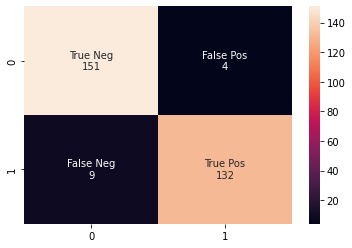

In [81]:
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)


### Predicting using RandomForest for under sampling

In [82]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[154   1]
 [ 15 126]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       155
           1       0.99      0.89      0.94       141

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.95       296
weighted avg       0.95      0.95      0.95       296


 Accuracy score : 0.9459459459459459
------------------------------


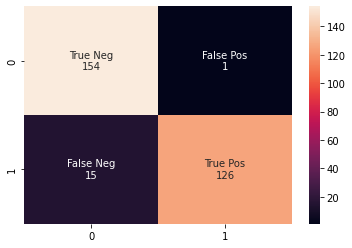

In [83]:
y_pred=rfc.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)

### Over-sampling using RandomOverSampling

In [87]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
os=RandomOverSampler()

In [94]:
x_res,y_res=os.fit_resample(x,y)

In [96]:
print(x.shape)
print(x_res.shape)

(284807, 30)
(568630, 30)


In [97]:
print(y.shape)
print(y_res.shape)

(284807,)
(568630,)


In [98]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [99]:
y_res.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [104]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.7)

In [105]:
## Using Logistic Regression
clf=GridSearchCV(lr,params,cv=kf,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1_macro')

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[82413  2862]
 [ 6545 78769]]
classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     85275
           1       0.96      0.92      0.94     85314

    accuracy                           0.94    170589
   macro avg       0.95      0.94      0.94    170589
weighted avg       0.95      0.94      0.94    170589


 Accuracy score : 0.9448557644396767
------------------------------


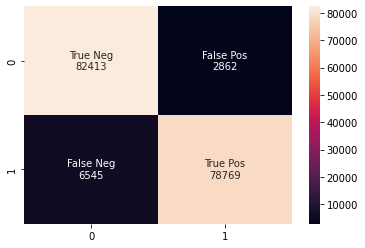

In [106]:
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)


In [107]:
#Using Random Forest
rfc.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 1, 1: 100})

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[85262    13]
 [    0 85314]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85275
           1       1.00      1.00      1.00     85314

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


 Accuracy score : 0.9999237934450639
------------------------------


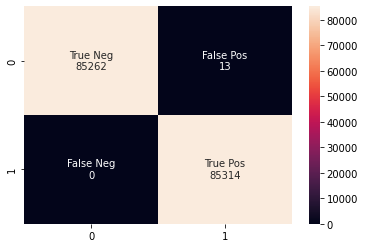

In [108]:
y_pred=rfc.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)

### Oversampling using SMOTE

In [109]:
from imblearn.over_sampling import SMOTE

In [116]:
sm=SMOTE()

In [111]:
x_res,y_res=sm.fit_resample(x,y)

In [112]:
print(x.shape)
print(x_res.shape)

(284807, 30)
(568630, 30)


In [117]:
print(y.shape)
print(y_res.shape)

(284807,)
(568630,)


In [118]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.7)

In [119]:
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1_macro')

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[84100  1229]
 [ 2936 82324]]
classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85329
           1       0.99      0.97      0.98     85260

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589


 Accuracy score : 0.9755845922070004
------------------------------


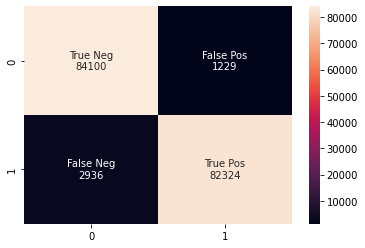

In [120]:
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)


### Over sampling using easy ensemble classifier

In [124]:
from imblearn.ensemble import EasyEnsembleClassifier

In [125]:
ec=EasyEnsembleClassifier()

In [127]:
x_res,y_res=sm.fit_resample(x,y)

In [128]:
print(x.shape)
print(x_res.shape)

(284807, 30)
(568630, 30)


In [129]:
print(y.shape)
print(y_res.shape)

(284807,)
(568630,)


In [130]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.7)

In [131]:
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1_macro')

confusion matrix of <function model at 0x7fe33a1f6a60>: 
 [[84175  1261]
 [ 3003 82150]]
classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85436
           1       0.98      0.96      0.97     85153

    accuracy                           0.98    170589
   macro avg       0.98      0.97      0.98    170589
weighted avg       0.98      0.98      0.98    170589


 Accuracy score : 0.9750042499809484
------------------------------


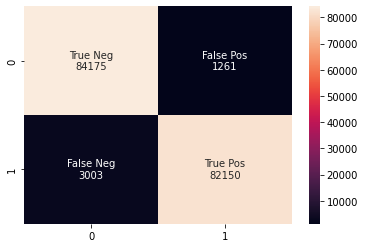

In [132]:
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
print(f'confusion matrix of {model}: \n',cf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
                      zip(group_names,group_counts)]
label=np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=label,fmt='')

print(f'classification report:\n',classification_report(y_test,y_pred))
print(f'\n Accuracy score :',accuracy_score(y_test,y_pred))
print('-'*30)
